## Estatística Frequências e Medidas

### Desafio Final - Grazielle Henrique

Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).

In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
with open("enem_2023.json", "r") as enem23:
  data = json.load(enem23)

**Conhecendo os dados* ⬇

In [ ]:
print(data)

{'Linguagens': {'0': 585.6692995213, '1': 359.384607812, '2': 622.7323840464, '3': 350.1646047457, '4': 384.0936572805, '5': 616.0433600852, '6': 511.8975933117, '7': 377.43981806, '8': 597.4629341711, '9': 536.5713980477, '10': None, '11': 617.5095137074, '12': 534.4632523026, '13': None, '14': 447.9889560902, '15': 639.2476388283, '16': None, '17': 365.5418373397, '18': 475.3523685461, '19': 558.4023378785, '20': 557.0196303254, '21': None, '22': 631.9603004053, '23': 602.1423271093, '24': 510.7198430486, '25': 604.8254552693, '26': 399.9201106129, '27': 655.9447222776, '28': 287.0, '29': 460.8897109785, '30': 530.4311483847, '31': 547.7287487263, '32': 463.4701182175, '33': 583.2753511866, '34': 429.5321366799, '35': 553.1447365617, '36': 404.8340637913, '37': 544.0459855225, '38': 526.1518358024, '39': 333.7389307381, '40': 463.2714980703, '41': 477.274987204, '42': 360.6296562425, '43': 568.1058311128, '44': 464.959243207, '45': 691.4394002382, '46': 374.165092953, '47': 627.58945

In [ ]:
df = pd.DataFrame(data)
df.head(10)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


In [ ]:
df.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
      dtype='object', length=1000)

In [ ]:
df.columns

Index(['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação', 'Sexo'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
df.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [ ]:
porcentagem_nulos = df.isnull().mean() * 100
print(porcentagem_nulos)

Linguagens              10.3
Ciências humanas         6.4
Ciências da natureza    17.6
Matemática               7.6
Redação                 14.0
Sexo                     0.0
dtype: float64


In [ ]:
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


---

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

---

1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
amplitudes = []
for coluna in df.columns[:-1]:
    notas = df[coluna].dropna()
    amplitude = np.max(notas) - np.min(notas)
    amplitudes.append(amplitude)

# Encontrar a maior amplitude
maior_amplitude = max(amplitudes)

# Imprimir a maior amplitude
print(f"Maior amplitude de nota: {maior_amplitude}")

# Encontrar o índice da disciplina com a maior amplitude
indice_maior_amplitude = amplitudes.index(max(amplitudes))

# Imprimir a disciplina com a maior amplitude
print(f"Disciplina com a maior amplitude: {df.columns[:-1][indice_maior_amplitude]}")

Maior amplitude de nota: 729.1600351395
Disciplina com a maior amplitude: Redação


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)

In [ ]:
medias = []
medianas = []
for coluna in df.columns[:-1]:
    media = df[coluna].dropna().mean()
    medias.append(media)
    mediana = df[coluna].dropna().median()
    medianas.append(mediana)

# Criar um DataFrame com as médias e medianas
df_medias_medianas = pd.DataFrame({"Disciplina": df.columns[:-1], "Média": medias, "Mediana": medianas})

# Imprimir o DataFrame
print(df_medias_medianas)

             Disciplina       Média     Mediana
0            Linguagens  514.524809  515.045250
1      Ciências humanas  527.042281  524.519920
2  Ciências da natureza  499.315583  500.479263
3            Matemática  535.965660  533.247767
4               Redação  637.783532  635.273973


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

In [ ]:
df_media = df
df_media = df_media.dropna()

df_media['Média Ponderada'] = (
  df_media['Redação'] * 2 +
  df_media['Matemática'] * 4 +
  df_media['Linguagens'] * 2 +
  df_media['Ciências humanas'] * 1 +
  df_media['Ciências da natureza'] * 1
) / 5
df_media.head()

<ipython-input-81-ea1f57aed95f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media['Média Ponderada'] = (


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,1030.040398
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,1246.384834
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,1153.052129
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,1087.530293
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem,1142.042429


In [ ]:
media_500 = df_media.sort_values('Média Ponderada', ascending=False)
media_500 = media_500.head(500)

In [ ]:
media_500["Média"] = media_500.iloc[:, :7].mean(axis=1)
media_500["Desvio Padrão"] = media_500.iloc[:, :7].std(axis=1)

<ipython-input-83-48e002ec526f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_500["Média"] = media_500.iloc[:, :7].mean(axis=1)
<ipython-input-83-48e002ec526f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_500["Desvio Padrão"] = media_500.iloc[:, :7].std(axis=1)


In [ ]:
media_500

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Ponderada,Média,Desvio Padrão
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,1365.975465,756.503264,334.148775
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,1360.206382,751.036999,319.161121
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,1342.531628,739.968701,317.461704
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,1328.768727,745.742992,317.133083
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,1317.195581,735.485316,309.075160
...,...,...,...,...,...,...,...,...,...
400,515.892318,398.431513,440.731835,522.484700,478.946903,Homem,983.756118,556.707231,214.362289
160,539.397184,608.405447,314.400000,507.648230,440.950905,Mulher,982.818909,565.603446,227.414932
529,416.114140,438.110249,429.881954,462.605411,679.843696,Mulher,982.065904,568.103559,225.426173
386,537.838737,570.471430,584.935736,437.841844,459.122741,Homem,980.139500,595.058331,197.719033


In [ ]:
media_geral = media_500['Média Ponderada'].mean()
desvio_padrao_geral = media_500['Média Ponderada'].std()

print(f'O valor da média dos 500 melhores alunos é de {media_geral:.2f} e o valor do desvio padrão é de {desvio_padrao_geral:.2f}.')

O valor da média dos 500 melhores alunos é de 1114.58 e o valor do desvio padrão é de 80.87.


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
media_500

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Ponderada,Média,Desvio Padrão
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,1365.975465,756.503264,334.148775
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,1360.206382,751.036999,319.161121
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,1342.531628,739.968701,317.461704
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,1328.768727,745.742992,317.133083
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,1317.195581,735.485316,309.075160
...,...,...,...,...,...,...,...,...,...
400,515.892318,398.431513,440.731835,522.484700,478.946903,Homem,983.756118,556.707231,214.362289
160,539.397184,608.405447,314.400000,507.648230,440.950905,Mulher,982.818909,565.603446,227.414932
529,416.114140,438.110249,429.881954,462.605411,679.843696,Mulher,982.065904,568.103559,225.426173
386,537.838737,570.471430,584.935736,437.841844,459.122741,Homem,980.139500,595.058331,197.719033


In [ ]:
estudantes_ciencia_computacao = media_500.head(40)

# Calcular a média e a variância
media_ciencia_computacao = estudantes_ciencia_computacao["Média Ponderada"].mean()
variancia_ciencia_computacao = estudantes_ciencia_computacao["Média Ponderada"].var()

print(f"Média dos estudantes de Ciência da Computação: {media_ciencia_computacao}")
print(f"Variância dos estudantes de Ciência da Computação: {variancia_ciencia_computacao}")


Média dos estudantes de Ciência da Computação: 1273.3654830150376
Variância dos estudantes de Ciência da Computação: 1183.0700144016405


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [ ]:
q3_matematica = df["Matemática"].quantile(0.75)
q3_linguagens = df["Linguagens"].quantile(0.75)

print(f"Teto do terceiro quartil para Matemática: {q3_matematica}")
print(f"Teto do terceiro quartil para Linguagens: {q3_linguagens}")

Teto do terceiro quartil para Matemática: 592.9129628887
Teto do terceiro quartil para Linguagens: 571.6358759278


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

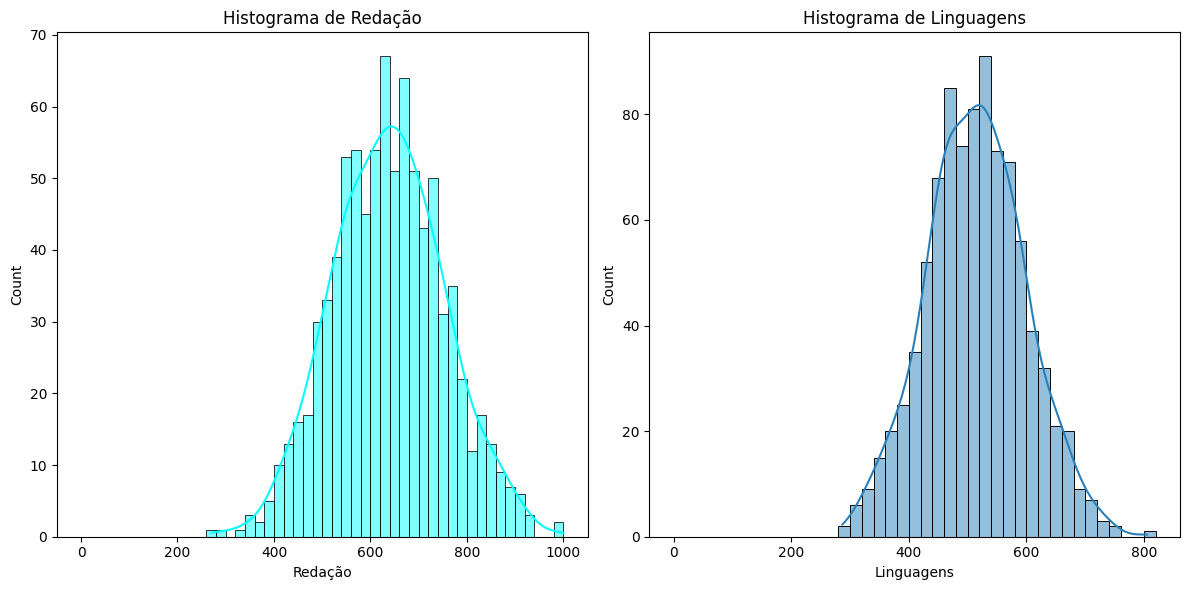

In [ ]:
# Criar histogramas de Redação e Linguagens
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df["Redação"], bins=range(0, df["Redação"].max().astype(int) + 20, 20), kde=True, color='#00FFFF')
plt.title("Histograma de Redação")

plt.subplot(1, 2, 2)
sns.histplot(df["Linguagens"], bins=range(0, df["Linguagens"].max().astype(int) + 20, 20), kde=True, color='#2980b9')
plt.title("Histograma de Linguagens")

plt.tight_layout()
plt.show()

**Os histogramas têm uma forma aproximadamente simétrica, semelhante a uma distribuição normal, podemos considerá-los simétricos.A presença de um pico central e uma cauda em ambos os lados pode sugerir simetria.*

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria?
**[plt.hist(dado, bins=_, range=[0, 1000])**

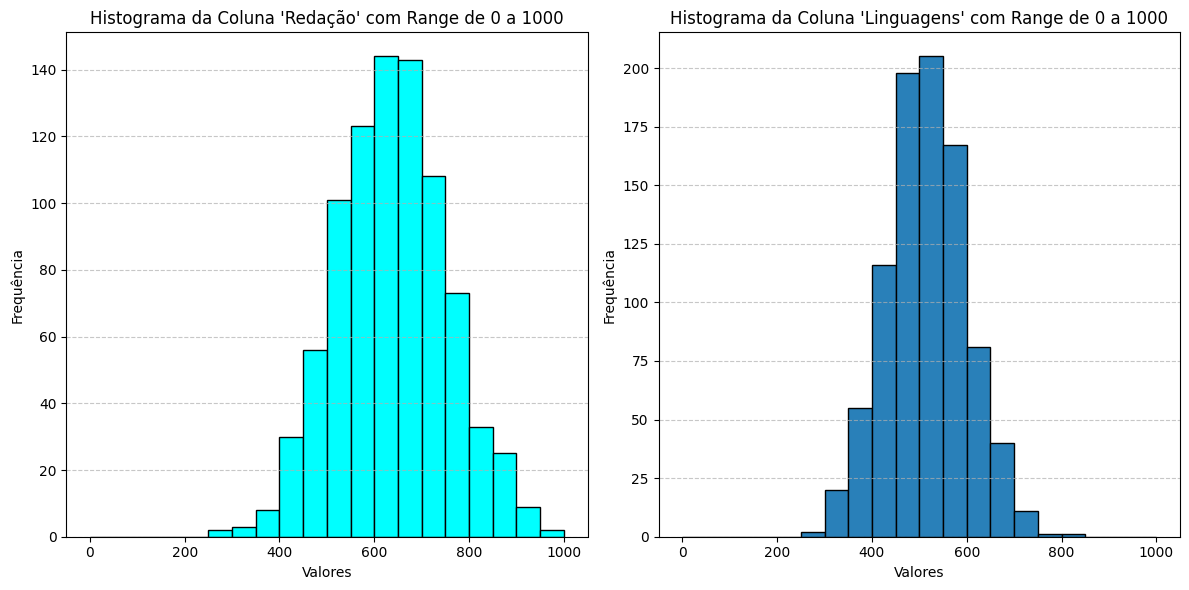

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma da coluna 'Redação'
axs[0].hist(df["Redação"], bins=20, range=[0, 1000], color="#00FFFF", edgecolor="black")
axs[0].set_title("Histograma da Coluna 'Redação' com Range de 0 a 1000")
axs[0].set_xlabel("Valores")
axs[0].set_ylabel("Frequência")
axs[0].grid(axis="y", linestyle="--", alpha=0.7)

# Histograma da coluna 'Linguagens'
axs[1].hist(df["Linguagens"], bins=20, range=[0, 1000], color="#2980b9", edgecolor="black")
axs[1].set_title("Histograma da Coluna 'Linguagens' com Range de 0 a 1000")
axs[1].set_xlabel("Valores")
axs[1].set_ylabel("Frequência")
axs[1].grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar layout
plt.tight_layout()
plt.show()

**A distribuição dos dados nas colunas "Redação" e "Linguagens" não é mais centrada em torno de uma média simétrica isso indica que os dados possuem uma assimetria (distribuição assimétrica).*

8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.

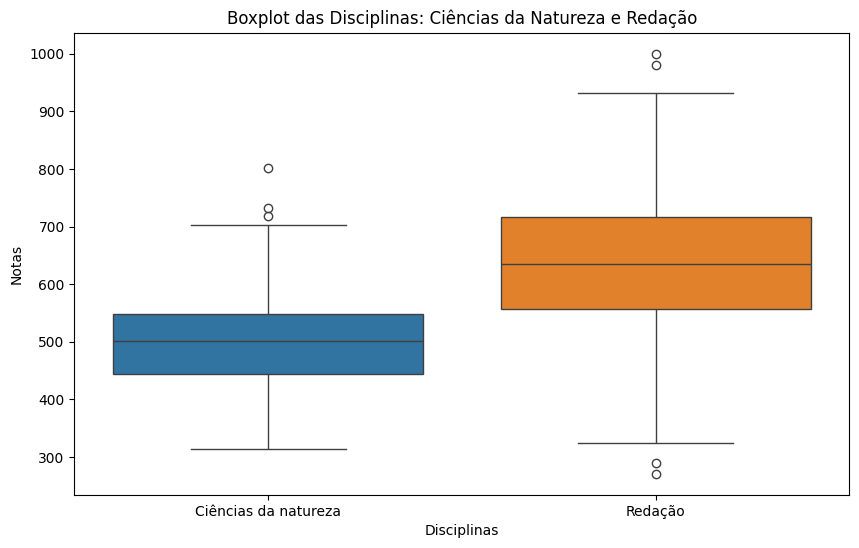

In [ ]:
disciplinas_selecionadas = df[["Ciências da natureza", "Redação"]]

# Criar boxplot com método IQR para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=disciplinas_selecionadas, showfliers=True)
plt.title("Boxplot das Disciplinas: Ciências da Natureza e Redação")
plt.xlabel("Disciplinas")
plt.ylabel("Notas")
plt.show()

**Depois da visualização desse boxplot conseguimos ver outliers nos dados, 3 outliers em Ciência da Natureza e 4 outliers em Redação.*

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)

In [ ]:
disciplinas_selecionadas = df[["Ciências da natureza", "Redação"]]

# Identificar outliers usando o método IQR
Q1 = disciplinas_selecionadas.quantile(0.25)
Q3 = disciplinas_selecionadas.quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar e remover outliers
outliers = ((disciplinas_selecionadas < limite_inferior) | (disciplinas_selecionadas > limite_superior))
disciplinas_sem_outliers = disciplinas_selecionadas[~outliers]

# Calcular a média nacional antes e depois da remoção dos outliers
media_nacional_antes = disciplinas_selecionadas.mean().mean()
media_nacional_depois = disciplinas_sem_outliers.mean().mean()

# Verificar se a alteração é significativa (maior que 5%)
alteracao_percentual = ((media_nacional_depois - media_nacional_antes) / media_nacional_antes) * 100

# Imprimir resultados
print(f"Média Nacional Antes da Remoção dos Outliers: {media_nacional_antes}")
print(f"Média Nacional Depois da Remoção dos Outliers: {media_nacional_depois}")
print(f"Alteração Percentual: {alteracao_percentual:.2f}%")

Média Nacional Antes da Remoção dos Outliers: 568.5495574592835
Média Nacional Depois da Remoção dos Outliers: 568.0950175285851
Alteração Percentual: -0.08%


**Depois de remover os outliers foi detectado que não haverá alteração significativa na média nacional.*

10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [ ]:
# Função para substituir valores nulos nas colunas com média, moda e mediana
def preencher_valores_nulos(coluna):
    media = coluna.mean()
    moda = coluna.mode()[0]
    mediana = coluna.median()

# Substituir valores nulos
    coluna_preenchida_media = coluna.fillna(media)
    coluna_preenchida_moda = coluna.fillna(moda)
    coluna_preenchida_mediana = coluna.fillna(mediana)

    return coluna_preenchida_media, coluna_preenchida_moda, coluna_preenchida_mediana

In [ ]:
# Remover a coluna "Sexo" antes de calcular
df = df.drop("Sexo", axis=1)

# Substituir valores nulos nas notas
for coluna in df.columns:
    df[f"{coluna}_media"], df[f"{coluna}_moda"], df[f"{coluna}_mediana"] = preencher_valores_nulos(df[coluna])

# Selecionar apenas as colunas originais
colunas_originais = df.columns[:5]

# Calcular média geral e desvio padrão antes e depois da substituição
medias_antes = df[colunas_originais].mean()
desvios_antes = df[colunas_originais].std()

medias_depois_media = df[[f"{coluna}_media" for coluna in colunas_originais]].mean()
desvios_depois_media = df[[f"{coluna}_media" for coluna in colunas_originais]].std()

medias_depois_moda = df[[f"{coluna}_moda" for coluna in colunas_originais]].mean()
desvios_depois_moda = df[[f"{coluna}_moda" for coluna in colunas_originais]].std()

medias_depois_mediana = df[[f"{coluna}_mediana" for coluna in colunas_originais]].mean()
desvios_depois_mediana = df[[f"{coluna}_mediana" for coluna in colunas_originais]].std()

In [ ]:
# Exibir resultados
print("Antes da substituição:")
print("Médias:")
print(medias_antes)
print("\nDesvios Padrão:")
print(desvios_antes)

print("\nDepois da substituição (Média):")
print("Médias:")
print(medias_depois_media)
print("\nDesvios Padrão:")
print(desvios_depois_media)

print("\nDepois da substituição (Moda):")
print("Médias:")
print(medias_depois_moda)
print("\nDesvios Padrão:")
print(desvios_depois_moda)

print("\nDepois da substituição (Mediana):")
print("Médias:")
print(medias_depois_mediana)
print("\nDesvios Padrão:")
print(desvios_depois_mediana)


###*Antes da Substituição:*

Médias: As médias originais representam o centro dos dados antes da substituição.
Desvios Padrão: Indicam a dispersão dos dados em relação à média antes da substituição.

###*Depois da Substituição (Média):*

Médias: As médias substituídas pela média são praticamente iguais às originais, o que é esperado, pois os valores nulos foram preenchidos pela média. Isso minimiza a alteração na média geral.
Desvios Padrão: O desvio padrão diminuiu em algumas disciplinas, indicando uma menor dispersão dos dados em relação à média.

###*Depois da Substituição (Moda):*

Médias: As médias substituídas pela moda mostram algumas diferenças em relação às originais, indicando que a moda pode não ser a melhor representação central dos dados.
Desvios Padrão: O desvio padrão, em geral, aumentou, o que sugere uma maior dispersão dos dados.

###*Depois da Substituição (Mediana):*

Médias: As médias substituídas pela mediana são semelhantes às originais, indicando que a mediana também preserva a centralidade dos dados.
Desvios Padrão: O desvio padrão diminuiu em algumas disciplinas, mostrando uma menor dispersão dos dados.

###***Conclusão:***

A substituição pela média parece ser a opção mais consistente, pois mantém as médias praticamente inalteradas e, em muitos casos, reduz o desvio padrão, indicando uma menor dispersão dos dados. Portanto, a média pode ser a melhor escolha para preenchimento de valores nulos nesse caso.